<a href="https://colab.research.google.com/github/np03cs4a220341-alt/Ai_final/blob/main/2331419_Sangharsha_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Regression Analysis**

##**Task 1. Exploratory Data Analysis and Data Understanding:**


---



 **1. Choosing a Dataset:**

**• Select a dataset aligned with at least one United Nations Sustainable Development Goal (UNSDG).**

-Dataset is Global Power Plant Database whicch is aligned with UNSDG 7: Affordable and Clean Energy.


**• Provide a detailed description of the dataset, including:**

**(a) When and by whom the dataset was created also, from where the dataset was accessed.**

-The dataset used for this regression task is the Global Power Plant Database, an openly available dataset compiled by the World Resources Institute and distributed through open data platforms such as Kaggle.


**(b) Justification of alignment with the selected UNSDG.**

-By predicting power plant generation capacity, the analysis supports efficient energy planning and infrastructure optimization. The results can help policymakers assess current energy production capabilities, identify gaps in clean energy deployment, and promote sustainable and affordable electricity access worldwide.

**(c) List and brief description of all attributes (features).**

•	Primary fuel type (coal, gas, hydro, solar, wind, etc.)

•	Country

•	Latitude and longitude

•	Commissioning year

•	Ownership and operational status

In [ ]:
# Import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning tools from scikit-learn
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Set chart style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

###**2) Exploratory Data Analysis (EDA)**

In [ ]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/Dataset/global_power_plant_database.csv')

# Show the size of the dataset
print(f'Dataset has {df.shape[0]} rows and {df.shape[1]} columns')
print()

# Show first 5 rows to see what the data looks like
print('First 5 rows of the dataset:')
df.head()

Dataset has 28664 rows and 22 columns

First 5 rows of the dataset:


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,fuel1,fuel2,fuel3,...,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,estimated_generation_gwh
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.00,32.3220,65.1190,Hydro,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.00,34.5560,69.4787,Hydro,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.00,34.6410,69.7170,Hydro,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,Nangarhar (Darunta) Hydroelectric Power Plant ...,GEODB0040536,11.55,34.4847,70.3633,Hydro,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,Northwest Kabul Power Plant Afghanistan,GEODB0040540,42.00,34.5638,69.1134,Gas,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Check data types and basic info about each column
# This helps us see which columns are numbers vs text
print('Data Types:')
print(df.dtypes)
print()
print('\nBasic Statistics for Numeric Columns')
df.describe().round(2)

Data Types:
country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
fuel1                        object
fuel2                        object
fuel3                        object
fuel4                        object
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
estimated_generation_gwh    float64
dtype: object


Basic Statistics for Numeric Columns


,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,estimated_generation_gwh
count,28664.00,28664.00,28664.00,14952.00,16145.00,439.00,455.00,958.00,8326.00,27536.00
mean,186.10,68.82,99.26,1994.70,2016.04,2339.27,2622.05,1859.66,532.67,807.80
std,523.03,3610.17,10927.81,23.41,1.26,4384.01,4138.19,3965.62,1935.49,2687.87
min,1.00,-77.85,-179.98,1896.00,2000.00,0.00,0.00,0.00,-768.62,0.00
25%,4.80,28.01,-79.06,1985.00,2016.00,226.74,253.47,57.90,3.20,8.10
50%,18.64,39.95,-3.93,2004.00,2016.00,731.33,1015.68,468.99,20.35,44.80
75%,99.20,46.98,21.01,2012.00,2016.00,2636.22,3170.87,2152.21,176.51,293.91
max,22500.00,415750.00,1075744.39,2018.00,2018.00,50834.00,28127.00,59546.86,32377.48,92268.76


###Check Missing Values


In [ ]:
# Count missing values in each column
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

# Create a neat table showing missing counts and percentages
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct.round(2)
}).sort_values('Missing %', ascending=False)

print('Missing Values Per Column:')
print(missing_df.to_string())

# Check for duplicates
print(f'\nDuplicate rows in dataset: {df.duplicated().sum()}')

print('\nExplanation: Many columns like fuel2, fuel3, fuel4 and generation_gwh columns')
print('have a lot of missing data (>85%). We will drop these columns later.')
print('commissioning_year has some missing values which we will fill with the median.')

Missing Values Per Column:
                          Missing Count  Missing %
fuel4                             28556      99.62
fuel3                             28368      98.97
generation_gwh_2013               28225      98.47
generation_gwh_2014               28209      98.41
generation_gwh_2015               27706      96.66
fuel2                             26959      94.05
generation_gwh_2016               20338      70.95
commissioning_year                13712      47.84
year_of_capacity_data             12519      43.67
owner                             10571      36.88
estimated_generation_gwh           1128       3.94
geolocation_source                  421       1.47
name                                 20       0.07
fuel1                                 3       0.01
latitude                              0       0.00
capacity_mw                           0       0.00
gppd_idnr                             0       0.00
country_long                          0       0.00
coun

###Visualizations


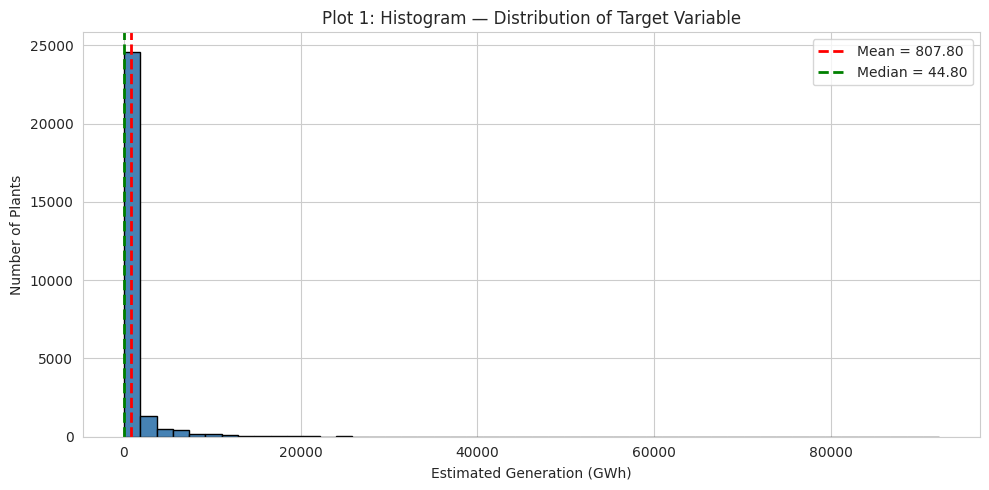

Explanation: The histogram is right-skewed — most power plants generate a small
amount of electricity, while a few large plants generate much more.
The mean is pulled to the right by these large plants.


In [ ]:
# PLOT 1: Histogram of Target Variable
# Shows how the target (estimated_generation_gwh) is distributed
# Most plants generate a small amount; only a few generate a lot.

plt.figure(figsize=(10, 5))
data = df['estimated_generation_gwh'].dropna()
plt.hist(data, bins=50, color='steelblue', edgecolor='black')
plt.axvline(data.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean = {data.mean():.2f}')
plt.axvline(data.median(), color='green', linestyle='--', linewidth=2, label=f'Median = {data.median():.2f}')
plt.xlabel('Estimated Generation (GWh)')
plt.ylabel('Number of Plants')
plt.title('Plot 1: Histogram — Distribution of Target Variable')
plt.legend()
plt.tight_layout()
plt.show()

print('Explanation: The histogram is right-skewed — most power plants generate a small')
print('amount of electricity, while a few large plants generate much more.')
print('The mean is pulled to the right by these large plants.')

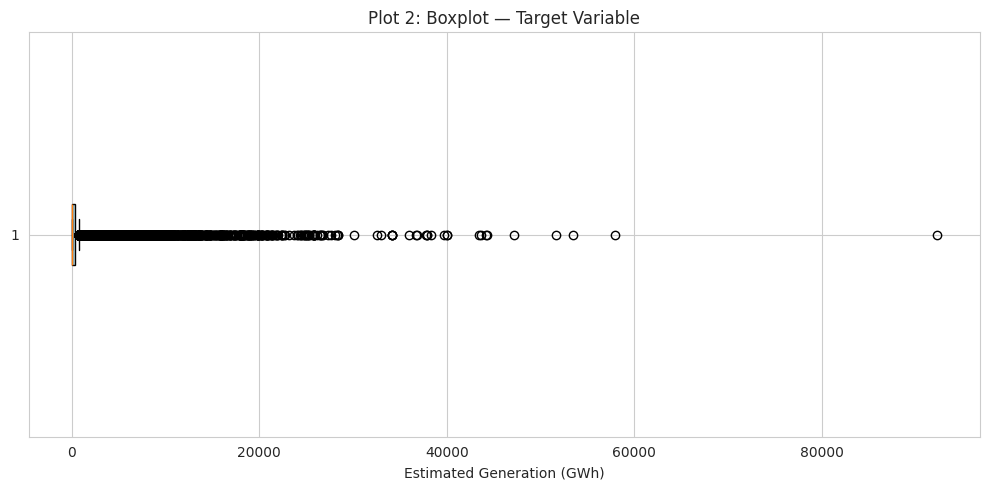

Explanation: The box shows where most of the data lies (between Q1 and Q3).
The dots on the right are outliers — extremely large power plants.
We will remove these outliers to help our models give better predictions.


In [ ]:
# PLOT 2: Boxplot of Target Variable
# Shows the spread and outliers of our target variable

plt.figure(figsize=(10, 5))
data = df['estimated_generation_gwh'].dropna()
plt.boxplot(data, vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue'))
plt.xlabel('Estimated Generation (GWh)')
plt.title('Plot 2: Boxplot — Target Variable')
plt.tight_layout()
plt.show()

print('Explanation: The box shows where most of the data lies (between Q1 and Q3).')
print('The dots on the right are outliers — extremely large power plants.')
print('We will remove these outliers to help our models give better predictions.')

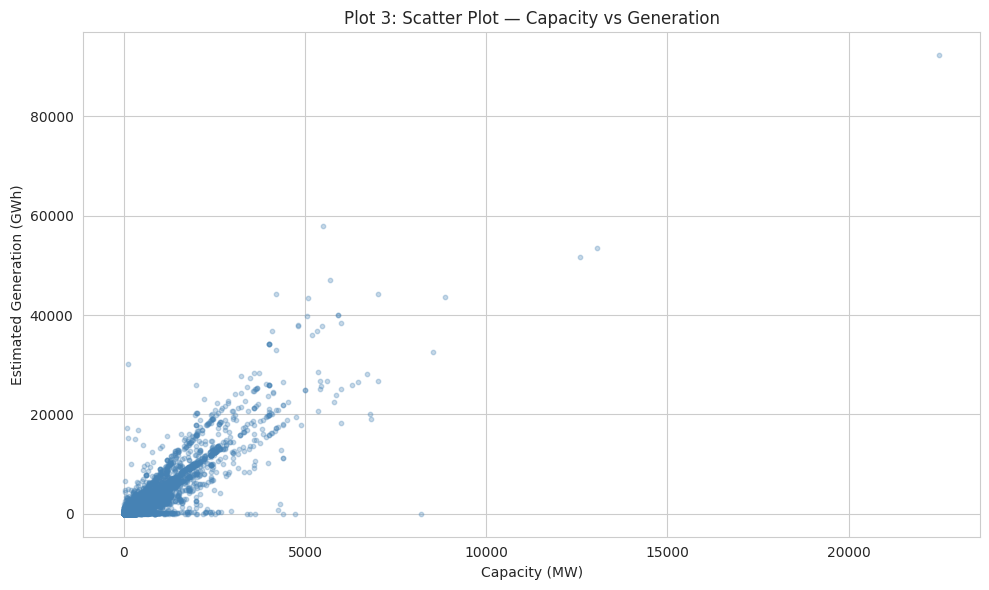

Correlation between capacity and generation: 0.9090

Explanation: There is a strong positive relationship — plants with higher
capacity (MW) tend to generate more electricity (GWh).
This means capacity_mw will be our strongest predictor.


In [ ]:
# PLOT 3: Scatter Plot — Capacity vs Generation
# Shows the relationship between a plant's capacity and how much it generates

plt.figure(figsize=(10, 6))
subset = df.dropna(subset=['capacity_mw', 'estimated_generation_gwh'])
plt.scatter(subset['capacity_mw'], subset['estimated_generation_gwh'],
            alpha=0.3, s=10, color='steelblue')
plt.xlabel('Capacity (MW)')
plt.ylabel('Estimated Generation (GWh)')
plt.title('Plot 3: Scatter Plot — Capacity vs Generation')
plt.tight_layout()
plt.show()

# Calculate correlation
corr = subset['capacity_mw'].corr(subset['estimated_generation_gwh'])
print(f'Correlation between capacity and generation: {corr:.4f}')
print()
print('Explanation: There is a strong positive relationship — plants with higher')
print('capacity (MW) tend to generate more electricity (GWh).')
print('This means capacity_mw will be our strongest predictor.')

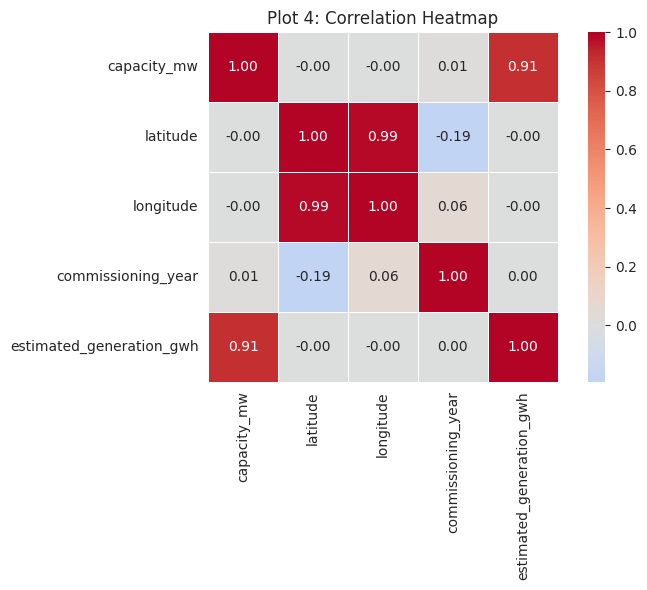

Explanation: The heatmap shows correlation values between features.
- capacity_mw has the strongest positive correlation with our target.
- latitude and longitude have weak correlations with generation.
- No two features are highly correlated with each other (no multicollinearity problem).


In [ ]:
# PLOT 4: Correlation Heatmap
# Shows how strongly each numeric feature is related to every other feature
# Values close to +1 or -1 = strong relationship, close to 0 = weak relationship

numeric_cols = ['capacity_mw', 'latitude', 'longitude', 'commissioning_year',
                'estimated_generation_gwh']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Plot 4: Correlation Heatmap')
plt.tight_layout()
plt.show()

print('Explanation: The heatmap shows correlation values between features.')
print('- capacity_mw has the strongest positive correlation with our target.')
print('- latitude and longitude have weak correlations with generation.')
print('- No two features are highly correlated with each other (no multicollinearity problem).')

###Data Preprocessing


In [ ]:
# Step 1: Remove duplicate rows
# Duplicates can bias our model, so we remove them
df_clean = df.drop_duplicates().copy()
print(f'Step 1 — Removed {df.shape[0] - len(df_clean)} duplicate rows. Rows remaining: {len(df_clean)}')

# Step 2: Drop rows where the target variable is missing
before = len(df_clean)
df_clean = df_clean.dropna(subset=['estimated_generation_gwh'])
print(f'\nStep 2 — Dropped {before - len(df_clean)} rows with missing target. Rows remaining: {len(df_clean)}')

# Step 3: Drop columns that are not useful for prediction
cols_to_drop = ['gppd_idnr', 'name', 'owner', 'source', 'url', 'geolocation_source',
                'country',
                'fuel2', 'fuel3', 'fuel4',
                'year_of_capacity_data',
                'generation_gwh_2013', 'generation_gwh_2014',
                'generation_gwh_2015', 'generation_gwh_2016']
df_clean = df_clean.drop(columns=cols_to_drop)
print(f'\nStep 3 — Dropped {len(cols_to_drop)} useless/mostly-missing columns.')
print(f'         Remaining columns: {list(df_clean.columns)}')

Step 1 — Removed 0 duplicate rows. Rows remaining: 28664

Step 2 — Dropped 1128 rows with missing target. Rows remaining: 27536

Step 3 — Dropped 15 useless/mostly-missing columns.
         Remaining columns: ['country_long', 'capacity_mw', 'latitude', 'longitude', 'fuel1', 'commissioning_year', 'estimated_generation_gwh']


In [ ]:
# Step 4: Convert data types where needed
# commissioning_year is stored as float (e.g., 2005.0) — we will convert to int after filling
print(f'Step 4 — commissioning_year dtype before: {df_clean["commissioning_year"].dtype}')
print(f'Missing values: {df_clean["commissioning_year"].isnull().sum()}')

# Step 5: Handle ALL missing values
# Fill commissioning_year missing values with the median (middle value)
# Median is better than mean because it is not affected by outliers
median_year = df_clean['commissioning_year'].median()
df_clean['commissioning_year'] = df_clean['commissioning_year'].fillna(median_year)
df_clean['commissioning_year'] = df_clean['commissioning_year'].astype(int)
print(f'\nStep 5 — Filled missing commissioning_year with median ({int(median_year)}), converted to int.')

# Drop any remaining rows with missing values to ensure 100% clean data
before = len(df_clean)
df_clean = df_clean.dropna()
print(f'Dropped {before - len(df_clean)} remaining rows with missing values.')

# Verify: zero missing values
print(f'\nTotal missing values now: {df_clean.isnull().sum().sum()}')

Step 4 — commissioning_year dtype before: float64
Missing values: 13109

Step 5 — Filled missing commissioning_year with median (2004), converted to int.
Dropped 0 remaining rows with missing values.

Total missing values now: 0


In [ ]:
# Step 6: Handle Outliers using the IQR method
# IQR = Q3 - Q1 (the range of the middle 50% of data)
# Anything below Q1 - 1.5*IQR or above Q3 + 1.5*IQR is considered an outlier

Q1 = df_clean['estimated_generation_gwh'].quantile(0.25)
Q3 = df_clean['estimated_generation_gwh'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

before = len(df_clean)
df_clean = df_clean[(df_clean['estimated_generation_gwh'] >= lower_bound) &
                    (df_clean['estimated_generation_gwh'] <= upper_bound)]

print(f'Step 6 — Outlier Removal (IQR Method):')
print(f'  Q1 = {Q1:.2f}, Q3 = {Q3:.2f}, IQR = {IQR:.2f}')
print(f'  Valid range: [{lower_bound:.2f}, {upper_bound:.2f}]')
print(f'  Outliers removed: {before - len(df_clean)}')
print(f'  Rows remaining: {len(df_clean)}')

Step 6 — Outlier Removal (IQR Method):
  Q1 = 8.10, Q3 = 293.91, IQR = 285.81
  Valid range: [-420.61, 722.62]
  Outliers removed: 4544
  Rows remaining: 22992


In [ ]:
# Step 7: Encode Categorical Variables
# Convert text columns to numbers.

# country_long has too many unique values (164 countries) for one-hot encoding
# So we use Label Encoding — assigns a unique number to each country
le_country = LabelEncoder()
df_clean['country_long'] = le_country.fit_transform(df_clean['country_long'])
print(f'Step 7a — Encoded country_long ({le_country.classes_.shape[0]} countries) using Label Encoding.')

# fuel1 has fewer categories, so we use One-Hot Encoding
# This creates a separate binary (0/1) column for each fuel type
fuel_types = df_clean['fuel1'].nunique()
df_clean = pd.get_dummies(df_clean, columns=['fuel1'], drop_first=False, dtype=int)
print(f'Step 7b — Encoded fuel1 ({fuel_types} fuel types) using One-Hot Encoding.')

print(f'\nFinal dataset shape: {df_clean.shape[0]} rows × {df_clean.shape[1]} columns')
print(f'Missing values: {df_clean.isnull().sum().sum()}')
print(f'\nAll columns: {list(df_clean.columns)}')
df_clean.head()

Step 7a — Encoded country_long (124 countries) using Label Encoding.
Step 7b — Encoded fuel1 (13 fuel types) using One-Hot Encoding.

Final dataset shape: 22992 rows × 19 columns
Missing values: 0

All columns: ['country_long', 'capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'estimated_generation_gwh', 'fuel1_Biomass', 'fuel1_Coal', 'fuel1_Cogeneration', 'fuel1_Gas', 'fuel1_Geothermal', 'fuel1_Hydro', 'fuel1_Nuclear', 'fuel1_Oil', 'fuel1_Other', 'fuel1_Petcoke', 'fuel1_Solar', 'fuel1_Waste', 'fuel1_Wind']


,country_long,capacity_mw,latitude,longitude,commissioning_year,estimated_generation_gwh,fuel1_Biomass,fuel1_Coal,fuel1_Cogeneration,fuel1_Gas,fuel1_Geothermal,fuel1_Hydro,fuel1_Nuclear,fuel1_Oil,fuel1_Other,fuel1_Petcoke,fuel1_Solar,fuel1_Waste,fuel1_Wind
7,0,27.0,39.9116,20.1047,1965,89.132075,0,0,0,0,0,1,0,0,0,0,0,0,0
10,0,5.0,41.3428,19.8964,1951,16.505940,0,0,0,0,0,1,0,0,0,0,0,0,0
11,0,24.0,41.6796,19.8305,1963,79.228512,0,0,0,0,0,1,0,0,0,0,0,0,0
12,0,25.0,41.6796,19.8936,1958,82.529700,0,0,0,0,0,1,0,0,0,0,0,0,0
14,0,98.0,40.4874,19.4340,2004,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Step 8: Split data into Features (X) and Target (y), then scale

# X = all columns EXCEPT the target (these are the inputs to our model)
# y = the target column (what we want to predict)
target = 'estimated_generation_gwh'
X = df_clean.drop(columns=[target])
y = df_clean[target]

print(f'Features (X): {X.shape[1]} columns')
print(f'Target (y): {len(y)} values')

# Split into 80% training and 20% testing
# Training set = model learns from this
# Test set = we check how well the model does on unseen data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'\nTraining samples: {len(X_train)}')
print(f'Test samples:     {len(X_test)}')

# Step 8b: Scale features using StandardScaler
# Scaling makes all features have mean=0 and std=1
# This is important for Neural Networks and Linear Regression
# (Random Forest does NOT need scaling, but it doesn't hurt)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data, then transform
X_test_scaled = scaler.transform(X_test)         # Only transform test data (no fitting!)
print('\nFeatures scaled using StandardScaler (mean=0, std=1).')

Features (X): 18 columns
Target (y): 22992 values

Training samples: 18393
Test samples:     4599

Features scaled using StandardScaler (mean=0, std=1).


In [ ]:
# Helper function to calculate all evaluation metrics at once
# We will use this for every model to keep things consistent

def evaluate_model(name, y_true, y_pred):
    """Calculate MAE, MSE, RMSE, and R² for a model."""
    mae  = mean_absolute_error(y_true, y_pred)      # Average absolute error
    mse  = mean_squared_error(y_true, y_pred)        # Average squared error
    rmse = np.sqrt(mse)                               # Square root of MSE
    r2   = r2_score(y_true, y_pred)                   # How well the model fits (1.0 = perfect)

    print(f'{name}:')
    print(f'  MAE  = {mae:.4f}  (average error in GWh)')
    print(f'  MSE  = {mse:.4f}  (penalizes large errors more)')
    print(f'  RMSE = {rmse:.4f} (error in same units as target)')
    print(f'  R²   = {r2:.4f}   (1.0 = perfect, 0.0 = bad)')

    return {'Model': name, 'MAE': round(mae, 4), 'MSE': round(mse, 4),
            'RMSE': round(rmse, 4), 'R2': round(r2, 4)}



---


##**Task 2. Build a Neural Network Model for Regression:**

• Design and implement a regression neural network (e.g., MLP with continuous output).

• Clearly describe:

– Network architecture (layers, neurons, activation functions)

– Loss function and optimizer

• Evaluate performance on training and test sets (e.g., MSE, RMSE, R-squared)

In [ ]:
# Build and train the Neural Network (MLP = Multi-Layer Perceptron)
mlp = MLPRegressor(
    hidden_layer_sizes=(128, 64, 32),  # 3 hidden layers with 128, 64, 32 neurons
    activation='relu',                  # ReLU activation function
    solver='adam',                       # Adam optimizer
    max_iter=500,                        # Maximum training rounds
    early_stopping=True,                 # Stop early if no improvement
    validation_fraction=0.1,             # Use 10% of training data for validation
    random_state=42,                     # For reproducibility
    learning_rate='adaptive',            # Reduce learning rate when stuck
    learning_rate_init=0.001             # Starting learning rate
)

# Train the model (use scaled data because NN needs it)
print('Training Neural Network...')
mlp.fit(X_train_scaled, y_train)
print(f'Training finished in {mlp.n_iter_} iterations.\n')

# Evaluate on Training set
print('Training Set Performance')
mlp_train = evaluate_model('MLP Train', y_train, mlp.predict(X_train_scaled))

# Evaluate on Test set
print('\nTest Set Performance')
mlp_test = evaluate_model('MLP Test', y_test, mlp.predict(X_test_scaled))

Training Neural Network...
Training finished in 112 iterations.

Training Set Performance
MLP Train:
  MAE  = 27.0376  (average error in GWh)
  MSE  = 3572.3924  (penalizes large errors more)
  RMSE = 59.7695 (error in same units as target)
  R²   = 0.8316   (1.0 = perfect, 0.0 = bad)

Test Set Performance
MLP Test:
  MAE  = 26.5647  (average error in GWh)
  MSE  = 3554.9845  (penalizes large errors more)
  RMSE = 59.6237 (error in same units as target)
  R²   = 0.8183   (1.0 = perfect, 0.0 = bad)


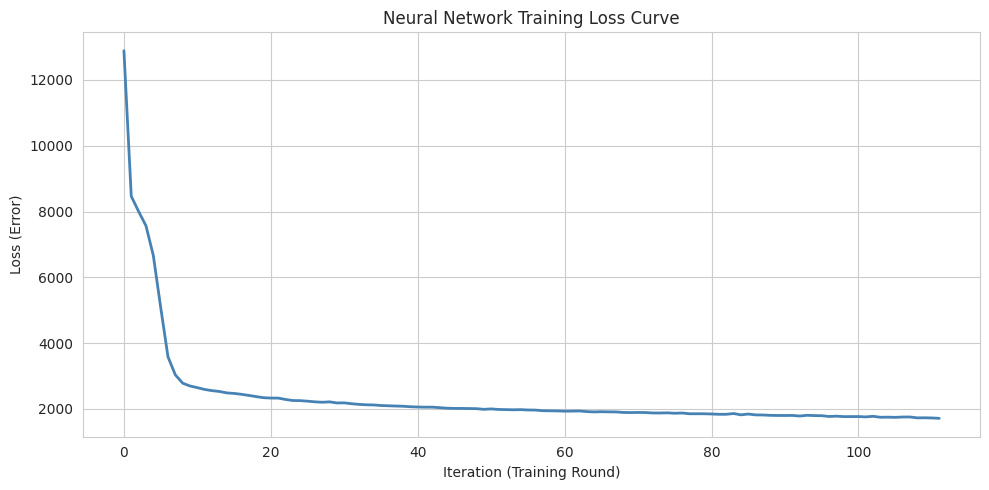

Explanation: The loss drops quickly at the start and then flattens out.
This means the model learned most of the patterns early on and then converged.


In [ ]:
# Plot the training loss curve
# This shows how the model's error decreased during training
plt.figure(figsize=(10, 5))
plt.plot(mlp.loss_curve_, color='steelblue', linewidth=2)
plt.xlabel('Iteration (Training Round)')
plt.ylabel('Loss (Error)')
plt.title('Neural Network Training Loss Curve')
plt.tight_layout()
plt.show()

print('Explanation: The loss drops quickly at the start and then flattens out.')
print('This means the model learned most of the patterns early on and then converged.')

---
##**Task 3. Build Primary Machine Learning Models (Two Classical ML Models):**

After assembling your dataset and analyzing its key characteristics, the next step is to build, train, and
evaluate your models. Follow the steps below to complete this task:

1. Split the dataset into training and testing sets.

2. Build at least two different regression models (e.g., Linear Regression, Random Forest Regressor, SVR,
Decision Tree).

3. Evaluate both models using appropriate metrics (MSE, RMSE, R-squared, MAE, etc.)

4. Provide an initial comparison and discuss which model seems better.


**Linear Regression**

In [ ]:
#Model 1: Linear Regression
# Uses scaled data because it works better with features on the same scale

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

print('Linear Regression')
print('\nTraining Set:')
lr_train = evaluate_model('LR Train', y_train, lr.predict(X_train_scaled))
print('\nTest Set:')
lr_test = evaluate_model('LR Test', y_test, lr.predict(X_test_scaled))

Linear Regression

Training Set:
LR Train:
  MAE  = 82.1462  (average error in GWh)
  MSE  = 15950.8037  (penalizes large errors more)
  RMSE = 126.2965 (error in same units as target)
  R²   = 0.2481   (1.0 = perfect, 0.0 = bad)

Test Set:
LR Test:
  MAE  = 77.8061  (average error in GWh)
  MSE  = 14044.7577  (penalizes large errors more)
  RMSE = 118.5106 (error in same units as target)
  R²   = 0.2820   (1.0 = perfect, 0.0 = bad)


**Random Forest Regressor**

In [ ]:
# Model 2: Random Forest Regressor
# Does not need scaled data (tree-based models don't care about scale)

rf = RandomForestRegressor(
    n_estimators=100,       # Build 100 trees
    min_samples_split=5,    # Need at least 5 samples to split a node
    random_state=42,        # For reproducibility
    n_jobs=-1               # Use all CPU cores for speed
)
rf.fit(X_train, y_train)

print('Random Forest Regressor')
print('\nTraining Set:')
rf_train = evaluate_model('RF Train', y_train, rf.predict(X_train))
print('\nTest Set:')
rf_test = evaluate_model('RF Test', y_test, rf.predict(X_test))

Random Forest Regressor

Training Set:
RF Train:
  MAE  = 5.2113  (average error in GWh)
  MSE  = 345.4625  (penalizes large errors more)
  RMSE = 18.5866 (error in same units as target)
  R²   = 0.9837   (1.0 = perfect, 0.0 = bad)

Test Set:
RF Test:
  MAE  = 10.8824  (average error in GWh)
  MSE  = 1599.6278  (penalizes large errors more)
  RMSE = 39.9953 (error in same units as target)
  R²   = 0.9182   (1.0 = perfect, 0.0 = bad)


In [ ]:
# Compare Both Models Side by Side
comparison = pd.DataFrame([lr_test, rf_test])
print('Initial Model Comparison (Test Set)')
print(comparison.to_string(index=False))

print('\nExplanation: Random Forest usually performs better because it can capture non-linear patterns.')
print('Linear Regression assumes a straight-line relationship, which is too simple for this data.')

Initial Model Comparison (Test Set)
  Model     MAE        MSE     RMSE     R2
LR Test 77.8061 14044.7577 118.5106 0.2820
RF Test 10.8824  1599.6278  39.9953 0.9182

Explanation: Random Forest usually performs better because it can capture non-linear patterns.
Linear Regression assumes a straight-line relationship, which is too simple for this data.


##**Task 4. Hyperparameter Optimization with Cross-Validation:**

1. Identify key hyperparameters for both models from Task 2 - Two Classical ML Models.

2. Apply cross-validation (e.g., GridSearchCV or RandomizedSearchCV) to find optimal parameters.

3. Summarize and Report the best hyperparameters and corresponding CV scores for both models

**Hyperparameter Tuning for Linear Regression (GridSearchCV)**

In [ ]:
# Hyperparameter Tuning for Linear Regression (Ridge)
# Ridge = Linear Regression + regularization (alpha)
# We try different alpha values to find the best one

from sklearn.linear_model import Ridge

ridge_params = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 50.0, 100.0, 500.0]
}

grid_lr = GridSearchCV(
    Ridge(),                # The model to tune
    ridge_params,           # The settings to try
    cv=5,                   # 5-fold cross-validation
    scoring='r2',           # Use R² as the score
    n_jobs=-1               # Use all CPU cores
)

print('Tuning Linear Regression (Ridge)...')
grid_lr.fit(X_train_scaled, y_train)

print(f'\nBest alpha: {grid_lr.best_params_["alpha"]}')
print(f'Best CV R² Score: {grid_lr.best_score_:.4f}')

# Show all results
results_lr = pd.DataFrame(grid_lr.cv_results_)[['param_alpha', 'mean_test_score', 'rank_test_score']]
results_lr.columns = ['Alpha', 'Mean CV R²', 'Rank']
print('\nAll Results:')
print(results_lr.sort_values('Rank').to_string(index=False))

Tuning Linear Regression (Ridge)...

Best alpha: 500.0
Best CV R² Score: 0.2422

All Results:
  Alpha  Mean CV R²  Rank
500.000    0.242164     1
100.000    0.241903     2
 50.000    0.241709     3
 10.000    0.239226     4
  1.000    0.109153     5
  0.100   -1.160667     6
  0.010   -2.113580     7
  0.001   -2.259651     8


**Hyperparameter Tuning for Random Forest (GridSearchCV)**

In [ ]:
# Hyperparameter Tuning for Random Forest
# We try different combinations of 3 key settings

rf_params = {
    'n_estimators': [50, 100, 200],        # Number of trees
    'max_depth': [10, 20, 30],             # How deep each tree can grow
    'min_samples_split': [2, 5, 10]        # Minimum samples to split a node
}

grid_rf = GridSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    rf_params,
    cv=5,                   # 5-fold cross-validation
    scoring='r2',           # Use R² as the score
    n_jobs=-1               # Use all CPU cores
)

print('Tuning Random Forest...')
grid_rf.fit(X_train, y_train)

print(f'\nBest parameters: {grid_rf.best_params_}')
print(f'Best CV R² Score: {grid_rf.best_score_:.4f}')

Tuning Random Forest...

Best parameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}
Best CV R² Score: 0.9158


In [ ]:
# Summary of Best Hyperparameters

print('  HYPERPARAMETER TUNING SUMMARY')
print(f'\n  Linear Regression (Ridge):')
print(f'    Best alpha: {grid_lr.best_params_["alpha"]}')
print(f'    CV R² Score: {grid_lr.best_score_:.4f}')
print(f'\n  Random Forest:')
for k, v in grid_rf.best_params_.items():
    print(f'    {k}: {v}')
print(f'    CV R² Score: {grid_rf.best_score_:.4f}')
print('\nExplanation: GridSearchCV tried every combination of hyperparameters')
print('and picked the ones that gave the highest R² score using 5-fold cross-validation.')
print('This helps us get a more reliable and accurate model.')

  HYPERPARAMETER TUNING SUMMARY

  Linear Regression (Ridge):
    Best alpha: 500.0
    CV R² Score: 0.2422

  Random Forest:
    max_depth: 30
    min_samples_split: 2
    n_estimators: 200
    CV R² Score: 0.9158

Explanation: GridSearchCV tried every combination of hyperparameters
and picked the ones that gave the highest R² score using 5-fold cross-validation.
This helps us get a more reliable and accurate model.




---

##**Task 5. Feature Selection:**

• Apply one of the feature selection techniques.

• Perform feature selection for both models.

• Justify the chosen features and method.


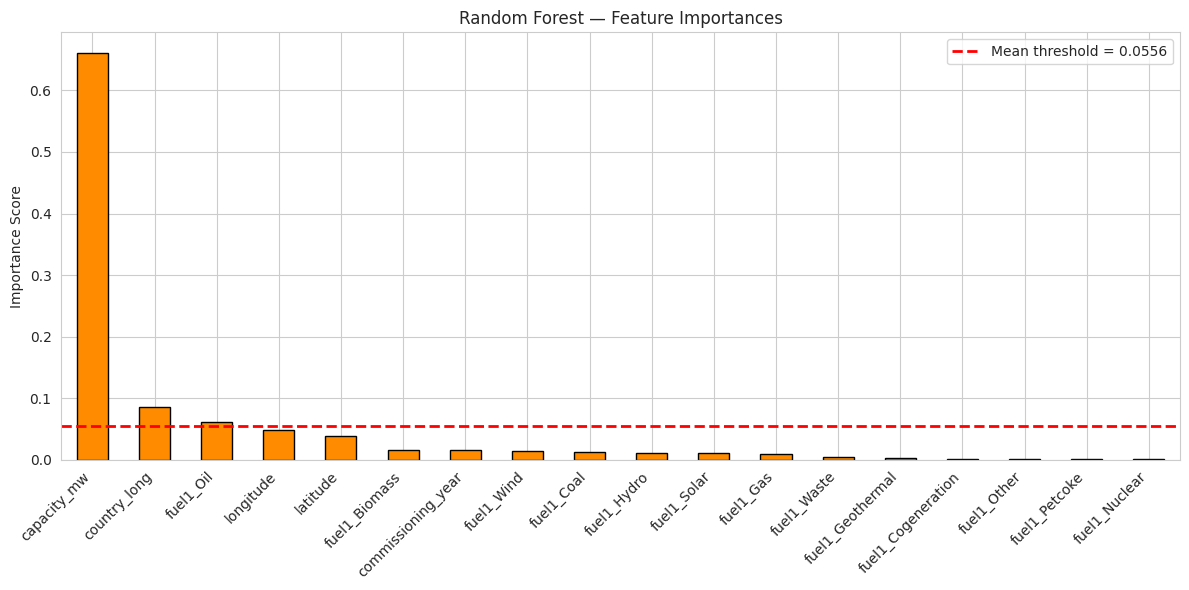

Random Forest selected 3 out of 18 features:
  ['capacity_mw', 'country_long', 'fuel1_Oil']


In [ ]:
# Feature Selection for Random Forest
# Get the best Random Forest model from tuning
best_rf = grid_rf.best_estimator_
feature_names = X_train.columns.tolist()

# Get feature importances and sort them
rf_importances = pd.Series(best_rf.feature_importances_, index=feature_names)
rf_importances = rf_importances.sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
rf_importances.plot(kind='bar', color='darkorange', edgecolor='black')
plt.axhline(y=rf_importances.mean(), color='red', linestyle='--',
            linewidth=2, label=f'Mean threshold = {rf_importances.mean():.4f}')
plt.title('Random Forest — Feature Importances')
plt.ylabel('Importance Score')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Select features above the mean importance
rf_selected = rf_importances[rf_importances > rf_importances.mean()].index.tolist()
print(f'Random Forest selected {len(rf_selected)} out of {len(feature_names)} features:')
print(f'  {rf_selected}')

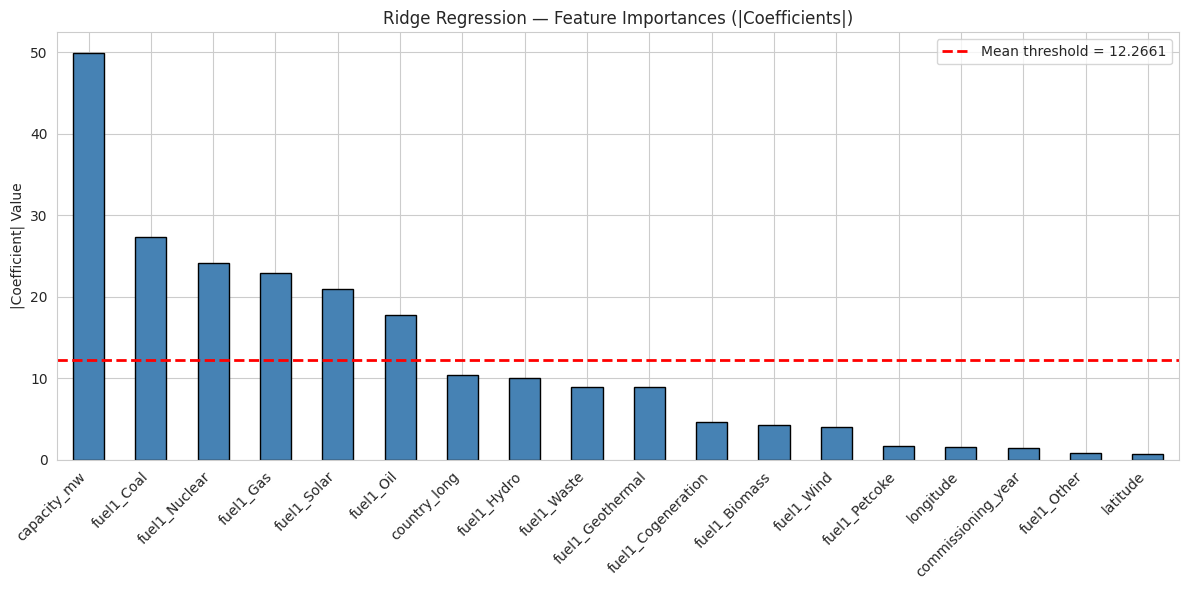

Ridge selected 6 out of 18 features:
  ['capacity_mw', 'fuel1_Coal', 'fuel1_Nuclear', 'fuel1_Gas', 'fuel1_Solar', 'fuel1_Oil']


In [ ]:
# Feature Selection for Linear Regression (Ridge)
# Get the best Ridge model from tuning
best_ridge = grid_lr.best_estimator_

# For Ridge, we use the absolute value of coefficients as importance
# Larger |coefficient| = more influence on prediction
ridge_importances = pd.Series(np.abs(best_ridge.coef_), index=feature_names)
ridge_importances = ridge_importances.sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
ridge_importances.plot(kind='bar', color='steelblue', edgecolor='black')
plt.axhline(y=ridge_importances.mean(), color='red', linestyle='--',
            linewidth=2, label=f'Mean threshold = {ridge_importances.mean():.4f}')
plt.title('Ridge Regression — Feature Importances (|Coefficients|)')
plt.ylabel('|Coefficient| Value')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Select features above the mean importance
ridge_selected = ridge_importances[ridge_importances > ridge_importances.mean()].index.tolist()
print(f'Ridge selected {len(ridge_selected)} out of {len(feature_names)} features:')
print(f'  {ridge_selected}')

In [ ]:
# Feature Selection Summary

print('  FEATURE SELECTION SUMMARY')
print(f'\n  Total features available: {len(feature_names)}')
print(f'\n  Ridge selected ({len(ridge_selected)} features):')
for f in ridge_selected:
    print(f'    - {f}')
print(f'\n  Random Forest selected ({len(rf_selected)} features):')
for f in rf_selected:
    print(f'    - {f}')
print('\nExplanation: We only keep the most important features for each model.')
print('This removes noise and can improve the models accuracy.')

  FEATURE SELECTION SUMMARY

  Total features available: 18

  Ridge selected (6 features):
    - capacity_mw
    - fuel1_Coal
    - fuel1_Nuclear
    - fuel1_Gas
    - fuel1_Solar
    - fuel1_Oil

  Random Forest selected (3 features):
    - capacity_mw
    - country_long
    - fuel1_Oil

Explanation: We only keep the most important features for each model.
This removes noise and can improve the models accuracy.




---


##**Task 6. Final Models and Comparative Analysis:**

• Rebuild both models using:

– Optimal hyperparameters from Task 4

– Selected features from Task 5

• Evaluate final performance on the test set.

• Compare models using a structured table.

In [ ]:
# Final Ridge Regression
# Using best alpha + selected features only

# Scale only the selected features
scaler_ridge = StandardScaler()
X_train_ridge = scaler_ridge.fit_transform(X_train[ridge_selected])
X_test_ridge  = scaler_ridge.transform(X_test[ridge_selected])

# Build the final model with best hyperparameters
final_ridge = Ridge(alpha=grid_lr.best_params_['alpha'])
final_ridge.fit(X_train_ridge, y_train)

# Cross-validation score (how reliable the model is)
ridge_cv = cross_val_score(final_ridge, X_train_ridge, y_train, cv=5, scoring='r2').mean()

# Predict on test set
ridge_pred = final_ridge.predict(X_test_ridge)

print(f'Final Ridge Regression — {len(ridge_selected)} features, alpha={grid_lr.best_params_["alpha"]}')
print(f'CV R² Score: {ridge_cv:.4f}')
ridge_final = evaluate_model('Final Ridge', y_test, ridge_pred)

Final Ridge Regression — 6 features, alpha=500.0
CV R² Score: 0.2213
Final Ridge:
  MAE  = 81.0072  (average error in GWh)
  MSE  = 14541.3521  (penalizes large errors more)
  RMSE = 120.5875 (error in same units as target)
  R²   = 0.2567   (1.0 = perfect, 0.0 = bad)


In [ ]:
# Final Random Forest
# Using best hyperparameters + selected features only

final_rf = RandomForestRegressor(**grid_rf.best_params_, random_state=42, n_jobs=-1)
final_rf.fit(X_train[rf_selected], y_train)

# Cross-validation score
rf_cv = cross_val_score(final_rf, X_train[rf_selected], y_train, cv=5,
                        scoring='r2', n_jobs=-1).mean()

# Predict on test set
rf_pred = final_rf.predict(X_test[rf_selected])

print(f'Final Random Forest — {len(rf_selected)} features, params={grid_rf.best_params_}')
print(f'CV R² Score: {rf_cv:.4f}')
rf_final = evaluate_model('Final RF', y_test, rf_pred)

Final Random Forest — 3 features, params={'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}
CV R² Score: 0.7843
Final RF:
  MAE  = 29.2967  (average error in GWh)
  MSE  = 4903.1788  (penalizes large errors more)
  RMSE = 70.0227 (error in same units as target)
  R²   = 0.7494   (1.0 = perfect, 0.0 = bad)


In [ ]:
# FINAL COMPARISON TABLE

table = pd.DataFrame({
    'Model': ['Linear Regression (Ridge)', 'Random Forest'],
    'Features Used': [f'Selected ({len(ridge_selected)})', f'Selected ({len(rf_selected)})'],
    'MAE': [ridge_final['MAE'], rf_final['MAE']],
    'RMSE': [ridge_final['RMSE'], rf_final['RMSE']],
    'R²': [ridge_final['R2'], rf_final['R2']],
    'CV R² Score': [round(ridge_cv, 4), round(rf_cv, 4)]
})

print('FINAL MODEL COMPARISON TABLE:\n')
print(table.to_string(index=False))

# Find the best model
best_model = table.loc[table['R²'].idxmax(), 'Model']
print(f'\nBest performing model: {best_model}')

FINAL MODEL COMPARISON TABLE:

                    Model Features Used     MAE     RMSE     R²  CV R² Score
Linear Regression (Ridge)  Selected (6) 81.0072 120.5875 0.2567       0.2213
            Random Forest  Selected (3) 29.2967  70.0227 0.7494       0.7843

Best performing model: Random Forest
